In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import sklearn
print (sklearn.__version__)
import matplotlib.pyplot as plt
import seaborn as sns


0.19.1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [3]:
data = pd.read_csv('C:\\Users\\emb-ashwcho\\Downloads\\driverdata.csv', sep=',')
data.head()

,latitutde,longitude,speed,behaviour,quality
0,6.73038,150.39692,23,average,2
1,57.67859,-163.16893,0,slow,1
2,-20.88434,-19.47666,2,slow,1
3,-51.07434,-57.43183,46,fast,3
4,-62.47534,91.74678,14,slow,1


In [4]:
data=data.drop("behaviour",axis=1)

In [5]:
data.head()

,latitutde,longitude,speed,quality
0,6.73038,150.39692,23,2
1,57.67859,-163.16893,0,1
2,-20.88434,-19.47666,2,1
3,-51.07434,-57.43183,46,3
4,-62.47534,91.74678,14,1


In [6]:
data.corr()

,latitutde,longitude,speed,quality
latitutde,1.000000,-0.074175,0.031554,0.037785
longitude,-0.074175,1.000000,0.037910,0.009898
speed,0.031554,0.037910,1.000000,0.971078
quality,0.037785,0.009898,0.971078,1.000000


Text(0.5,1,'Relationship between speed and quality')

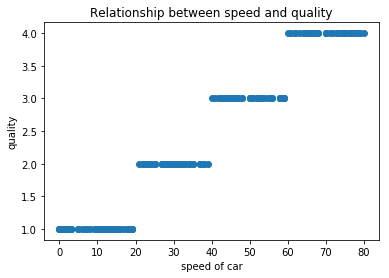

In [7]:
plt.scatter(data.speed, data.quality)
plt.xlabel("speed of car")
plt.ylabel("quality")
plt.title("Relationship between speed and quality")

In [10]:
# 4. Split data into training and test sets
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=123, 
                                                    stratify=y)
 
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=10))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
#print(clf2.predict(X_test))

0.9854557207498384
0.018000000000000002


In [13]:
# 10. Save model for future use
joblib.dump(clf, 'driverbehaviour.pkl')
clf2 = joblib.load('driverbehaviour.pkl')
list2=[[6,150,62]]
clf2.predict(list2) #topredict new data in future


array([4.])

In [ ]:
y_test

In [ ]:
y_train

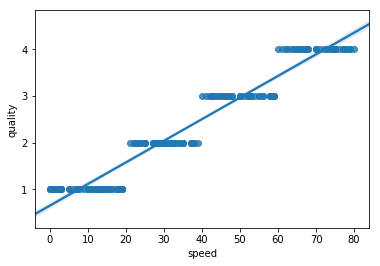

In [14]:
sns.regplot(y="quality", x="speed", data=data, fit_reg = True)


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('quality ~ speed',data).fit()
print (m.summary())

C:\Users\emb-ashwcho\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3275.
Date:                Thu, 05 Apr 2018   Prob (F-statistic):          4.01e-125
Time:                        15:10:11   Log-Likelihood:                -19.735
No. Observations:                 200   AIC:                             43.47
Df Residuals:                     198   BIC:                             50.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6507      0.035     18.621      0.0

Text(0.5,1,'quality vs Predicted quality: $Y_i$ vs $\\hat{Y}_i$')

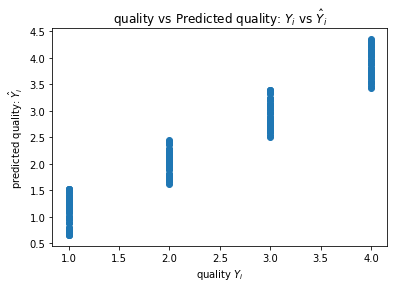

In [16]:
plt.scatter(data['quality'], m.fittedvalues)
plt.xlabel("quality $Y_i$")
plt.ylabel("predicted quality: $\hat{Y}_i$")
plt.title("quality vs Predicted quality: $Y_i$ vs $\hat{Y}_i$")

In [18]:
my_list = data["speed"].values
my_list
import csv
columns = 1
rows = 200
with open("random_num.csv", "wb") as outfile:
    writer = csv.writer(outfile)
for i in my_list:
            if (i>=0 and i<20):
                print ("slow")
            elif (i>19 and i<40):
                print("average")
            elif (i>39 and i<60):
                print("fast")
            else:
                print("very_fast")





            

average
slow
slow
fast
slow
average
average
slow
slow
fast
average
fast
slow
slow
fast
average
slow
fast
very_fast
very_fast
slow
average
very_fast
very_fast
average
slow
slow
average
very_fast
average
fast
slow
slow
fast
average
fast
fast
slow
slow
average
average
very_fast
slow
average
fast
slow
fast
slow
fast
fast
slow
very_fast
very_fast
fast
average
very_fast
very_fast
slow
average
fast
average
average
slow
very_fast
very_fast
fast
slow
slow
average
slow
slow
average
fast
slow
slow
very_fast
very_fast
slow
very_fast
slow
very_fast
slow
slow
slow
average
fast
fast
average
fast
slow
very_fast
average
average
fast
very_fast
average
very_fast
average
slow
slow
average
average
fast
slow
average
fast
fast
very_fast
fast
fast
slow
very_fast
average
average
slow
very_fast
fast
fast
fast
very_fast
average
average
fast
very_fast
average
average
slow
very_fast
slow
average
slow
very_fast
average
average
slow
fast
very_fast
fast
very_fast
slow
average
slow
slow
fast
slow
fast
average
slow
ave

In [19]:
for i in my_list:
            if (i>=0 and i<20):
                print (1)
            elif (i>19 and i<40):
                print(2)
            elif (i>39 and i<60):
                print(3)
            else:
                print(4)


2
1
1
3
1
2
2
1
1
3
2
3
1
1
3
2
1
3
4
4
1
2
4
4
2
1
1
2
4
2
3
1
1
3
2
3
3
1
1
2
2
4
1
2
3
1
3
1
3
3
1
4
4
3
2
4
4
1
2
3
2
2
1
4
4
3
1
1
2
1
1
2
3
1
1
4
4
1
4
1
4
1
1
1
2
3
3
2
3
1
4
2
2
3
4
2
4
2
1
1
2
2
3
1
2
3
3
4
3
3
1
4
2
2
1
4
3
3
3
4
2
2
3
4
2
2
1
4
1
2
1
4
2
2
1
3
4
3
4
1
2
1
1
3
1
3
2
1
2
1
1
3
4
4
3
1
3
4
1
4
3
1
2
1
1
4
1
4
2
2
3
2
3
2
4
1
2
2
1
3
2
2
3
1
3
3
4
4
1
2
1
1
3
3
4
4
4
2
4
1
